# London Restaurants - Recommander System

![title](logo.png)

## Data Cleaning

In [1]:
import pandas as pd 
import numpy as np

In [2]:
#dataframe regarding the restaurants
rpay = pd.read_csv('UCIML/chefmozaccepts.csv')
rcuisine = pd.read_csv('UCIML/chefmozcuisine.csv')
ropeninghours= pd.read_csv('UCIML/chefmozhours4.csv')
rparking = pd.read_csv('UCIML/chefmozparking.csv')
rlocation= pd.read_csv('UCIML/geoplaces2.csv')
                       
#ratings
ratings = pd.read_csv('UCIML/rating_final.csv')

#dataframe regarding the users 
ucuisine = pd.read_csv('UCIML/usercuisine.csv')
upay = pd.read_csv('UCIML/userpayment.csv')
uprofile = pd.read_csv('UCIML/userprofile.csv')                         

**Create a dataframe holding all information related to the restaurants**

Here is an example of a dataframe decribing the payment method by restaurant. There are many others holiding informations such as the opening hours, parking options. The objective is now to make only one dataframe out of those small ones to facilitate the data analysis. 

In [3]:
rpay.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [4]:
#the payment dataframe 
rpay[rpay ['Rpayment']=='Visa'] = 'VISA'
rpay.drop_duplicates(inplace=True)
payment= pd.get_dummies(rpay['Rpayment'])
result = pd.concat([rpay, payment], axis=1)

resto = result.groupby(['placeID'])['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Japan_Credit_Bureau', 'gift_certificates'].sum().reset_index()

resto[['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Japan_Credit_Bureau', 'gift_certificates']] = resto[['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Japan_Credit_Bureau', 'gift_certificates']].astype(bool) 
resto.head()

,placeID,cash,VISA,MasterCard-Eurocard,American_Express,bank_debit_cards,checks,Discover,Carte_Blanche,Diners_Club,Japan_Credit_Bureau,gift_certificates
0,132002,False,False,True,True,False,False,False,False,True,False,False
1,132012,False,False,False,True,True,False,False,False,True,False,False
2,132019,False,False,True,True,False,False,False,False,True,False,False
3,132023,False,False,False,True,True,False,False,False,True,True,False
4,132024,False,False,False,True,True,False,False,False,True,False,False


In [5]:
#the cuisine dataframe 
kk = pd.merge(rcuisine, resto, how ='left', on='placeID')
kk.head()

,placeID,Rcuisine,cash,VISA,MasterCard-Eurocard,American_Express,bank_debit_cards,checks,Discover,Carte_Blanche,Diners_Club,Japan_Credit_Bureau,gift_certificates
0,135110,Spanish,True,True,True,True,True,False,False,False,False,False,False
1,135109,Italian,True,False,False,False,False,False,False,False,False,False,False
2,135107,Latin_American,True,True,True,True,True,False,False,False,False,False,False
3,135106,Mexican,True,True,True,False,False,False,False,False,False,False,False
4,135105,Fast_Food,True,False,False,False,False,False,False,False,False,False,False


In [6]:
def opening(input):
    if input != 'None':
        a = input[:5]
        return a
    else:
        return input

def closing(input):
    if input != 'None':
        b = input[-6:-1] 
        return b 
    else:
        return input

In [7]:
#opening hours data frame 
cc = ropeninghours.pivot_table(index='placeID',columns='days',values='hours', aggfunc=lambda x: ' '.join(x))
cc.rename(columns={'Mon;Tue;Wed;Thu;Fri;': 'MondayToFriday', 'Sat;': 'Saturday','Sun;': 'Sunday'}, inplace=True)

cc.reset_index(inplace=True)

cc['MondayToFriday'] = cc['MondayToFriday'].astype(str)
cc['Saturday'] = cc['Saturday'].astype(str) 
cc['Sunday'] = cc['Sunday'].astype(str) 

cc['MFstart'] = cc['MondayToFriday'].apply(opening)
cc['MFend'] = cc['MondayToFriday'].apply(closing)

cc['Satstart'] = cc['Saturday'].apply(opening)
cc['Satend'] = cc['Saturday'].apply(closing)

cc['Sunstart'] = cc['Sunday'].apply(opening)
cc['Sunend'] = cc['Sunday'].apply(closing)

oo = pd.merge(cc, kk, how ='left', on='placeID')
oo.head()

,placeID,MondayToFriday,Saturday,Sunday,MFstart,MFend,Satstart,Satend,Sunstart,Sunend,...,VISA,MasterCard-Eurocard,American_Express,bank_debit_cards,checks,Discover,Carte_Blanche,Diners_Club,Japan_Credit_Bureau,gift_certificates
0,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00,...,False,False,True,True,False,False,False,True,False,False
1,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00,...,False,False,True,True,False,False,False,True,False,False
2,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00,...,False,False,True,True,False,False,False,True,True,False
3,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00,...,False,False,True,True,False,False,False,True,True,False
4,132024,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00,21:00,11:00,21:00,11:00,21:00,...,False,False,True,True,False,False,False,True,False,False


In [8]:
#parking data frame 
rparking.drop_duplicates(inplace=True)
parking= pd.get_dummies(rparking['parking_lot'])

result2 = pd.concat([rparking, parking], axis=1)

park = result2.groupby(['placeID'])['public', 'none', 'yes', 'valet parking', 'fee', 'street',
       'validated parking'].sum().reset_index()

pp = pd.merge(oo, park, how ='left', on='placeID')
pp.head()

,placeID,MondayToFriday,Saturday,Sunday,MFstart,MFend,Satstart,Satend,Sunstart,Sunend,...,Diners_Club,Japan_Credit_Bureau,gift_certificates,public,none,yes,valet parking,fee,street,validated parking
0,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00,...,True,False,False,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00,...,True,False,False,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00,...,True,True,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00,...,True,True,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,132024,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00,21:00,11:00,21:00,11:00,21:00,...,True,False,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#location dataframe 

rlocation.drop_duplicates(inplace=True)
restaurants = pd.merge(pp, rlocation, how ='left', on='placeID')
restaurants.drop(['MondayToFriday','Saturday','Sunday'], axis=1, inplace= True)
restaurants.drop_duplicates(inplace=True)
restaurants = restaurants.replace('?', np.nan)

restaurants[['public', 'none', 'yes', 'valet parking', 'fee', 'street',
       'validated parking']] = restaurants[['public', 'none', 'yes', 'valet parking', 'fee', 'street',
       'validated parking']].astype(bool) 

restaurants.tail()
#restaurants.drop(['parking_lot'], axis=1, inplace= True)

,placeID,MFstart,MFend,Satstart,Satend,Sunstart,Sunend,Rcuisine,cash,VISA,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
787,135107,07:00,23:30,07:00,23:30,07:00,23:30,Latin_American,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,135108,00:00,23:30,00:00,23:30,00:00,23:30,NaN,NaN,NaN,...,No_Alcohol_Served,none,informal,completely,low,NaN,familiar,f,closed,none
789,135109,08:00,21:00,08:00,21:00,08:00,21:00,Italian,True,False,...,Wine-Beer,not permitted,informal,no_accessibility,medium,NaN,quiet,f,closed,Internet
790,135110,08:00,19:00,00:00,00:00,00:00,00:00,Spanish,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,135111,00:00,23:30,00:00,23:30,00:00,23:30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Create a dataframe holding all information related to the users**

In [10]:
ucuisine['Rcuisine'].unique()

array(['American', 'Mexican', 'Bakery', 'Breakfast-Brunch', 'Japanese',
       'Contemporary', 'Bagels', 'Cafe-Coffee_Shop',
       'Continental-European', 'Cafeteria', 'Family', 'Juice', 'Hawaiian',
       'Hot_Dogs', 'Latin_American', 'Korean', 'Italian', 'Diner',
       'Fast_Food', 'Deli-Sandwiches', 'Regional', 'Fusion', 'Portuguese',
       'Indian-Pakistani', 'Eastern_European', 'Lebanese', 'Moroccan',
       'Barbecue', 'Polynesian', 'Polish', 'Chinese', 'Pizzeria',
       'Burgers', 'Afghan', 'Middle_Eastern', 'Mongolian', 'Bar', 'Cuban',
       'Tex-Mex', 'Spanish', 'Soup', 'Sushi', 'Game', 'Doughnuts',
       'Australian', 'Asian', 'Dessert-Ice_Cream', 'Seafood', 'Turkish',
       'Organic-Healthy', 'Steaks', 'Mediterranean', 'British', 'Austrian',
       'Israeli', 'Russian-Ukrainian', 'Malaysian', 'Vegetarian',
       'Peruvian', 'Tapas', 'Eclectic', 'African', 'Basque', 'Canadian',
       'Irish', 'Southwestern', 'Tea_House', 'International',
       'Pacific_Northwest', '

In [11]:
ucuisine.drop_duplicates(inplace=True)
cui= pd.get_dummies(ucuisine['Rcuisine'])

result2 = pd.concat([ucuisine, cui], axis=1)

cc= result2.groupby(['userID'])['American', 'Mexican', 'Bakery', 'Breakfast-Brunch', 'Japanese',
       'Contemporary', 'Bagels', 'Cafe-Coffee_Shop',
       'Continental-European', 'Cafeteria', 'Family', 'Juice', 'Hawaiian',
       'Hot_Dogs', 'Latin_American', 'Korean', 'Italian', 'Diner',
       'Fast_Food', 'Deli-Sandwiches', 'Regional', 'Fusion', 'Portuguese',
       'Indian-Pakistani', 'Eastern_European', 'Lebanese', 'Moroccan',
       'Barbecue', 'Polynesian', 'Polish', 'Chinese', 'Pizzeria',
       'Burgers', 'Afghan', 'Middle_Eastern', 'Mongolian', 'Bar', 'Cuban',
       'Tex-Mex', 'Spanish', 'Soup', 'Sushi', 'Game', 'Doughnuts',
       'Australian', 'Asian', 'Dessert-Ice_Cream', 'Seafood', 'Turkish',
       'Organic-Healthy', 'Steaks', 'Mediterranean', 'British', 'Austrian',
       'Israeli', 'Russian-Ukrainian', 'Malaysian', 'Vegetarian',
       'Peruvian', 'Tapas', 'Eclectic', 'African', 'Basque', 'Canadian',
       'Irish', 'Southwestern', 'Tea_House', 'International',
       'Pacific_Northwest', 'German', 'Persian', 'Ethiopian', 'Romanian',
       'Cambodian', 'Pacific_Rim', 'Tunisian', 'Filipino', 'Dim_Sum',
       'Greek', 'Thai', 'Swiss', 'Cajun-Creole', 'Armenian', 'Indigenous',
       'Bar_Pub_Brewery', 'Caribbean', 'Indonesian', 'Hungarian',
       'Dutch-Belgian', 'Kosher', 'Fine_Dining', 'Jamaican', 'Tibetan',
       'Southeast_Asian', 'Burmese', 'California', 'Scandinavian',
       'Chilean', 'North_African', 'Vietnamese', 'French', 'Brazilian',
       'Southern'].sum().reset_index()

cc.head()

,userID,American,Mexican,Bakery,Breakfast-Brunch,Japanese,Contemporary,Bagels,Cafe-Coffee_Shop,Continental-European,...,Southeast_Asian,Burmese,California,Scandinavian,Chilean,North_African,Vietnamese,French,Brazilian,Southern
0,U1001,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U1002,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U1003,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U1004,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,U1005,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ucuisine['userID'].nunique()

138

In [13]:
upay['Upayment'].unique()

array(['cash', 'bank_debit_cards', 'MasterCard-Eurocard', 'VISA',
       'American_Express'], dtype=object)

In [14]:
upay.drop_duplicates(inplace=True)
pay= pd.get_dummies(upay['Upayment'])

result2 = pd.concat([upay,pay], axis=1)

pp= result2.groupby(['userID'])['cash', 'bank_debit_cards', 'MasterCard-Eurocard', 'VISA',
       'American_Express'].sum().reset_index()

aa = pd.merge(cc, pp, how ='left', on='userID')
aa.iloc[:,1:] = aa.iloc[:,1:].astype(bool) 
aa.head()

,userID,American,Mexican,Bakery,Breakfast-Brunch,Japanese,Contemporary,Bagels,Cafe-Coffee_Shop,Continental-European,...,North_African,Vietnamese,French,Brazilian,Southern,cash,bank_debit_cards,MasterCard-Eurocard,VISA,American_Express
0,U1001,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,U1002,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,U1003,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,U1004,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,True,False,False,False
4,U1005,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [15]:
users = pd.merge(aa, uprofile, how ='left', on='userID')


In [16]:
users.head()

,userID,American,Mexican,Bakery,Breakfast-Brunch,Japanese,Contemporary,Bagels,Cafe-Coffee_Shop,Continental-European,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,True,False,False,False,False,False,False,False,False,...,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,False,True,False,False,False,False,False,False,False,...,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,False,True,False,False,False,False,False,False,False,...,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,False,True,True,True,True,True,True,True,True,...,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,True,False,False,False,False,False,False,False,False,...,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [17]:
ratings.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [46]:
ratings.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


# EDA

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Best rated restautants**

In [45]:
ratings.groupby('placeID')['rating'].mean().sort_values(ascending=False).head()

placeID
132955    2.000000
135034    2.000000
134986    2.000000
132922    1.833333
132755    1.800000
Name: rating, dtype: float64

**Restaurants having highest number of reviews**

In [48]:
ratings.groupby('placeID')['rating'].count().sort_values(ascending=False).head()

placeID
135085    36
132825    32
135032    28
132834    25
135052    25
Name: rating, dtype: int64

In [53]:
restaurants[restaurants['placeID']==135085]['Rcuisine']

745    Fast_Food
Name: Rcuisine, dtype: object

**Calculate the average rating by restaurant**

In [56]:
ra= pd.DataFrame(ratings.groupby('placeID')['rating'].mean())
ra.head()

,rating
placeID,
132560,0.50
132561,0.75
132564,1.25
132572,1.00
132583,1.00


In [131]:
re= pd.DataFrame(ratings.groupby('userID')['rating'].mean())
re = re.reset_index().head()

**Creating a new dataframe with the average rating and number of total ratings by restaurant**

In [65]:
ra['num of ratings'] = pd.DataFrame(ratings.groupby('placeID')['rating'].count())
ra.head()

,rating,num of ratings
placeID,,
132560,0.50,4
132561,0.75,4
132564,1.25,4
132572,1.00,15
132583,1.00,4


**Histogram (Number of Ratings)**

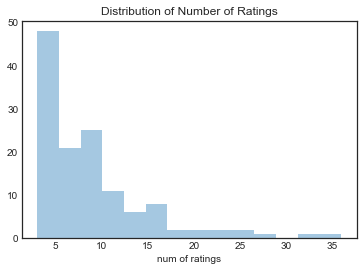

In [67]:
g = sns.distplot(ra['num of ratings'],kde=False)
g.set_title('Distribution of Number of Ratings');

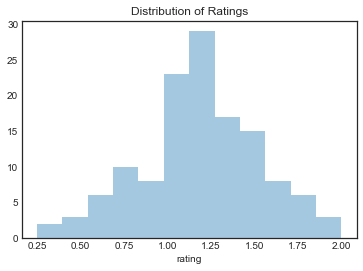

In [68]:
g = sns.distplot(ra['rating'],kde=False)
g.set_title('Distribution of Ratings');

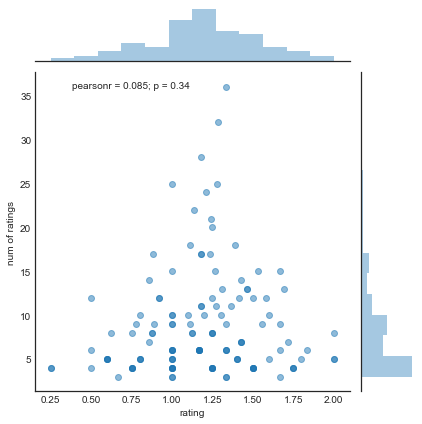

In [69]:
g = sns.jointplot(x='rating',y='num of ratings',data=ra,alpha=0.5);

In [84]:
restaurants.columns

Index(['placeID', 'MFstart', 'MFend', 'Satstart', 'Satend', 'Sunstart',
       'Sunend', 'Rcuisine', 'cash', 'VISA', 'MasterCard-Eurocard',
       'American_Express', 'bank_debit_cards', 'checks', 'Discover',
       'Carte_Blanche', 'Diners_Club', 'Japan_Credit_Bureau',
       'gift_certificates', 'public', 'none', 'yes', 'valet parking', 'fee',
       'street', 'validated parking', 'latitude', 'longitude',
       'the_geom_meter', 'name', 'address', 'city', 'state', 'country', 'fax',
       'zip', 'alcohol', 'smoking_area', 'dress_code', 'accessibility',
       'price', 'url', 'Rambience', 'franchise', 'area', 'other_services'],
      dtype='object')

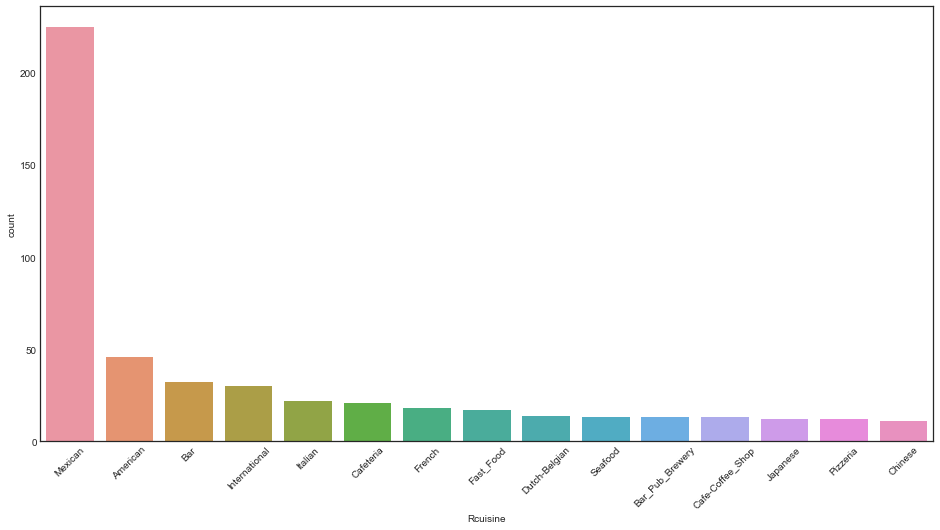

In [92]:
plt.figure(figsize = (16,8))
sns.countplot(x='Rcuisine', data=restaurants,  order=restaurants['Rcuisine'].value_counts().head(15).index)
plt.xticks(rotation=45);

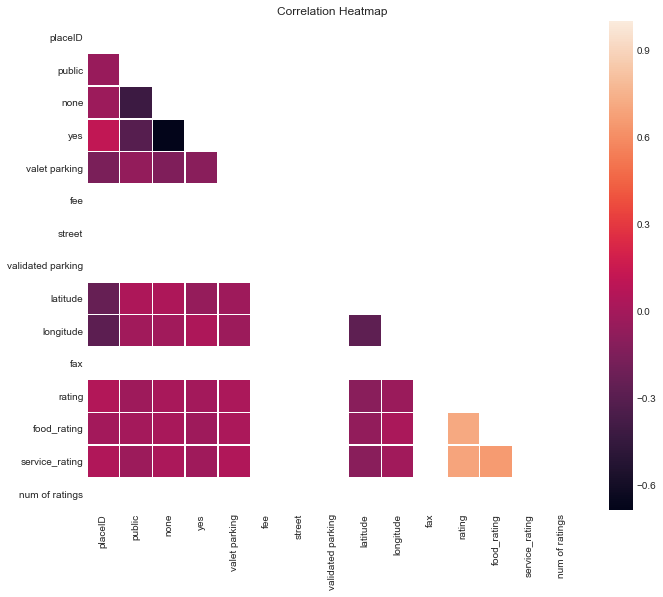

In [141]:
m = pd.merge(restaurants, ratings, on='placeID')
v= m.corr()

plt.figure(figsize = (11,9))
mask = np.zeros_like(v)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(v, linewidths=.5,mask=mask).set_title('Correlation Heatmap')

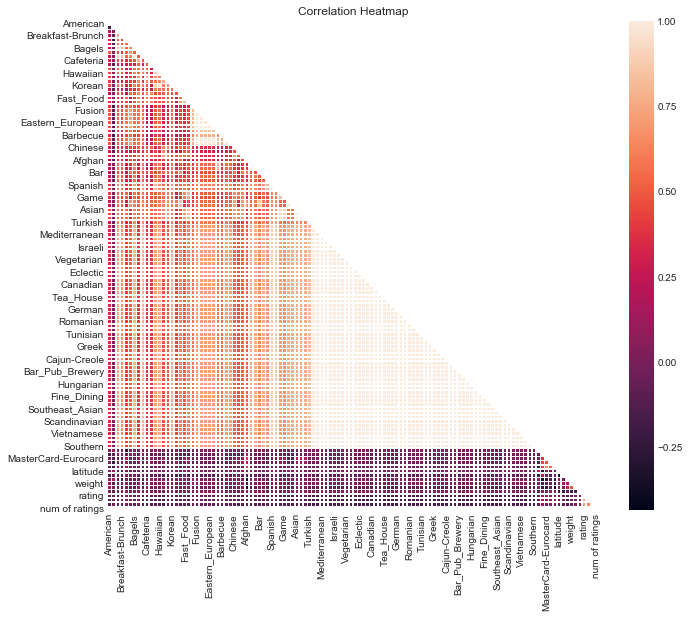

In [134]:
z = pd.merge(users, ratings, on='userID')
s= m.corr()

plt.figure(figsize = (11,9))
mask = np.zeros_like(s)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(s, linewidths=.5,mask=mask).set_title('Correlation Heatmap')

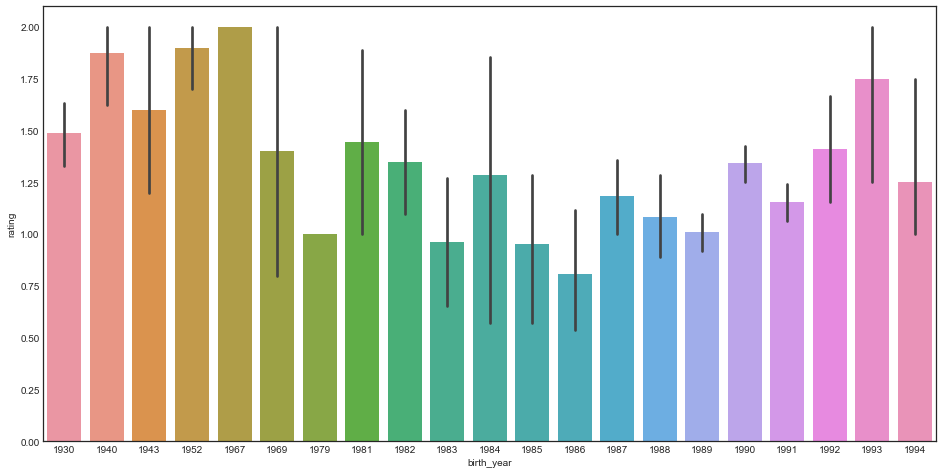

In [138]:
plt.figure(figsize = (16,8))
sns.barplot(x='birth_year',y='rating', data= z);

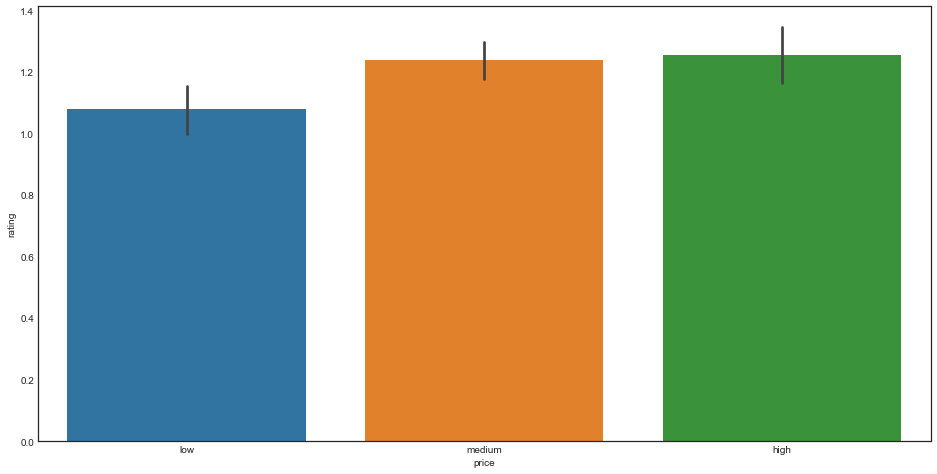

In [142]:
plt.figure(figsize = (16,8))
sns.barplot(x='price',y='rating', data= m);

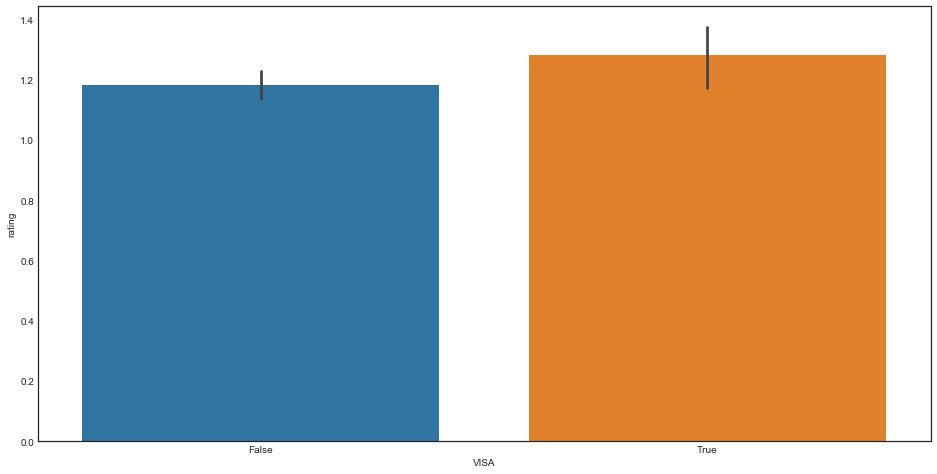

In [136]:
plt.figure(figsize = (16,8))
sns.barplot(x='VISA',y='rating', data= m);

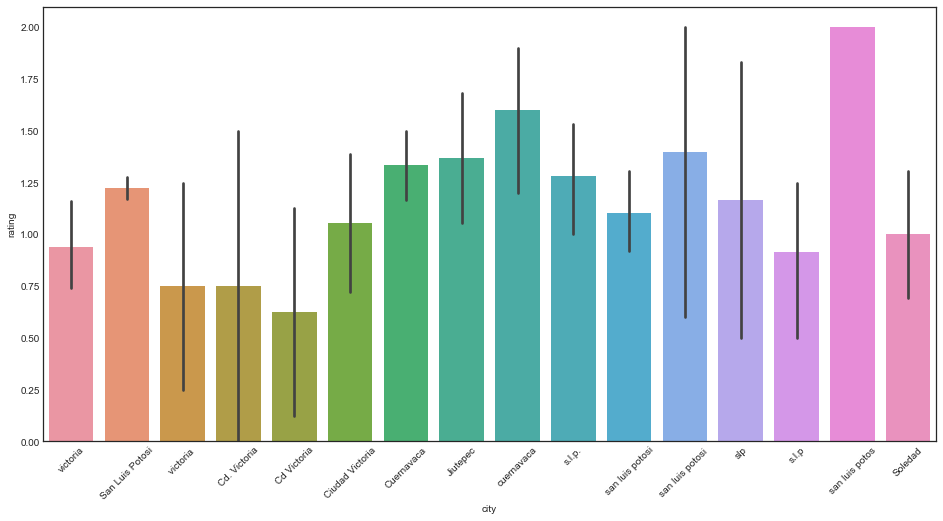

In [120]:
plt.figure(figsize = (16,8))
sns.barplot(x='city',y='rating', data= m)
plt.xticks(rotation=45);

# Recommending Similar Restaurants

**Creating a matrix: ratings, author, restaurant name**

In [145]:
restmat = ratings.pivot_table(index='userID',columns='placeID',values='rating')
restmat.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
U1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
U1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
U1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Ranking ratings by their count**

In [147]:
ra.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
placeID,,
135085,1.333333,36
132825,1.281250,32
135032,1.178571,28
135052,1.280000,25
132834,1.000000,25
135038,1.208333,24
135060,1.136364,22
135062,1.238095,21
135042,1.250000,20


**Selecting user ratings for the restaurants called 'Pret a Manger' and 'Union Jacks'**

In [149]:
place135085_user_ratings = restmat[135085]
place132825_user_ratings = restmat[132825]
place135085_user_ratings.head()

userID
U1001    0.0
U1002    1.0
U1003    NaN
U1004    NaN
U1005    NaN
Name: 135085, dtype: float64

**Use the .corrwith() method to calculate come up with similar restaurants**

Please note that I am using here the content based method.

The recommendation is based on descriptive attributes of the elements in our case the ratings to make recommendation. and similarities between customer requirements and elment, or on the use of constraints specifying user requirements. 

When a friend asks you for a book recommendation, it’s pretty natural to ask what kinds of books they like. From there, you could think of a few titles that are similar to the things they’ve liked in the past. This process, of recommending content based on its characteristics, is at the heart of content-based filtering, the technology behind Netflix and Pandora’s recommendation engines.


In [150]:
similar_to_place135085 = restmat.corrwith(place135085_user_ratings)
similar_to_place132825 = restmat.corrwith(place132825_user_ratings)

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [152]:
corr_place135085 = pd.DataFrame(similar_to_place135085 ,columns=['Correlation'])
corr_place135085.dropna(inplace=True)
corr_place135085.head()

,Correlation
placeID,
132572,-0.428571
132723,0.301511
132754,0.930261
132825,0.700745
132834,0.814823


In [153]:
corr_place135085.sort_values('Correlation',ascending=False).head(10)

,Correlation
placeID,
135076,1.000000
135085,1.000000
132937,1.000000
132925,1.000000
132922,1.000000
135053,1.000000
135066,1.000000
132754,0.930261
135045,0.912871


In [154]:
corr_place135085 = corr_place135085.join(ratings['num of ratings'])
corr_place135085.head()

,Correlation,num of ratings
placeID,,
132572,-0.428571,NaN
132723,0.301511,NaN
132754,0.930261,NaN
132825,0.700745,NaN
132834,0.814823,NaN


In [158]:
corr_place135085[corr_place135085['num of ratings']>1].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
placeID,,
